# **Part 1 : Prepare & Train**

[House Prices - Advanced Regression Techniques (Kaggle)](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

SalePrice is Target

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None # Show full df Columns
pd.options.display.max_rows = None # Show full df Rows

In [2]:
train_path = r"house-prices-advanced-regression-techniques\train.csv" # r for read all in string

# Read the CSV file using pandas
hp_train = pd.read_csv(train_path)

In [3]:
hp_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
hp_train.shape

(1460, 81)

In [5]:
hp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
hp_train['MSSubClass'] = hp_train['MSSubClass'].astype('str')
hp_train['MSSubClass'].dtype

dtype('O')

## **Deal with missing values**

In [7]:
# Null Count Function
def na_info(df):    
    msng_info = pd.DataFrame(df.isnull().sum().sort_values())
    msng_info = msng_info.reset_index()
    msng_info.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
    msng_info['percent_null'] = round(msng_info['null_count']/df.shape[0]*100 , 2)   # pct = percent
    display(msng_info[msng_info['null_count'] > 0])

In [8]:
na_info(hp_train)

col_name  null_count  percent_null
62    Electrical           1          0.07
63    MasVnrType           8          0.55
64    MasVnrArea           8          0.55
65      BsmtQual          37          2.53
66      BsmtCond          37          2.53
67  BsmtFinType1          37          2.53
68  BsmtFinType2          38          2.60
69  BsmtExposure          38          2.60
70    GarageQual          81          5.55
71  GarageFinish          81          5.55
72   GarageYrBlt          81          5.55
73    GarageType          81          5.55
74    GarageCond          81          5.55
75   LotFrontage         259         17.74
76   FireplaceQu         690         47.26
77         Fence        1179         80.75
78         Alley        1369         93.77
79   MiscFeature        1406         96.30
80        PoolQC        1453         99.52

some columns NaN = None

In [9]:
# NA meaning is truly none
fill_with_none_cols = ['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                       'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                       'PoolQC','Fence','MiscFeature']

hp_train[fill_with_none_cols].dtypes

Alley           object
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
FireplaceQu     object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
PoolQC          object
Fence           object
MiscFeature     object
dtype: object

In [10]:
hp_train[fill_with_none_cols] = hp_train[fill_with_none_cols].fillna('None')
na_info(hp_train)

col_name  null_count  percent_null
78   MasVnrArea           8          0.55
79  GarageYrBlt          81          5.55
80  LotFrontage         259         17.74

In [11]:
ms_cols = hp_train.columns[hp_train.isnull().any()]
ms_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [12]:
hp_train[ms_cols].dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [13]:
hp_train[ms_cols].describe()

LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000

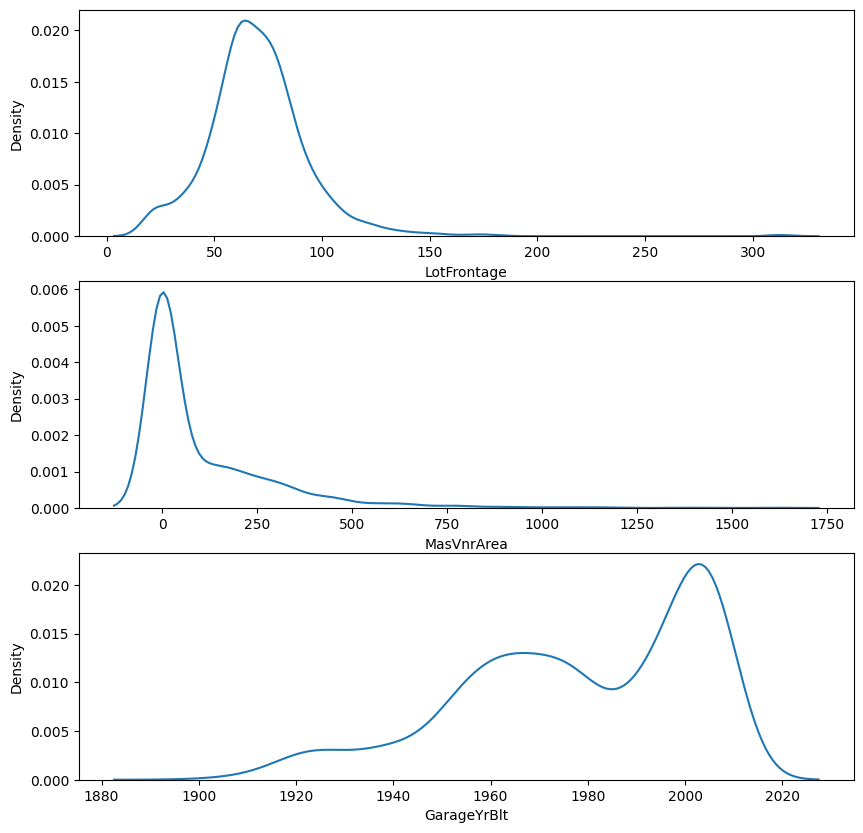

In [14]:
plt.figure(figsize=(10,10))

for i , col in enumerate(ms_cols) :
    plt.subplot(3,1,i+1)
    sns.kdeplot(data=hp_train , x=col)

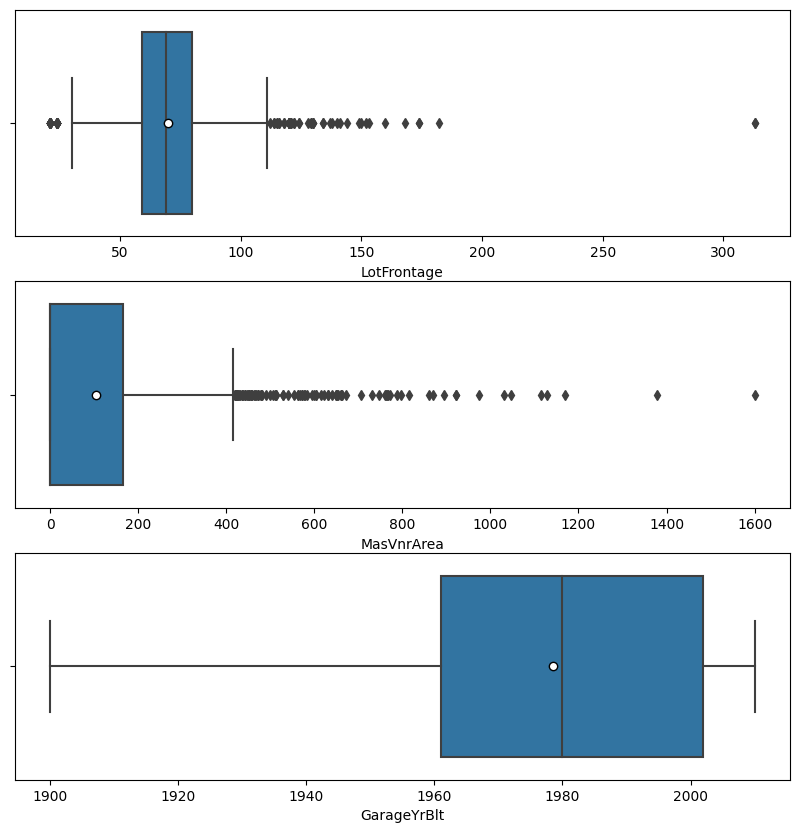

In [15]:
plt.figure(figsize=(10,10))
mean_type = {"marker":"o", "markerfacecolor":"white" ,"markeredgecolor":"black" }

for i , col in enumerate(ms_cols) :
    plt.subplot(3,1,i+1)
    sns.boxplot(data=hp_train , x=col , showmeans = True , meanprops = mean_type)

In [14]:
ms_mode =  hp_train[ms_cols].mode()
ms_mode

LotFrontage  MasVnrArea  GarageYrBlt
0         60.0         0.0       2005.0

<AxesSubplot: >

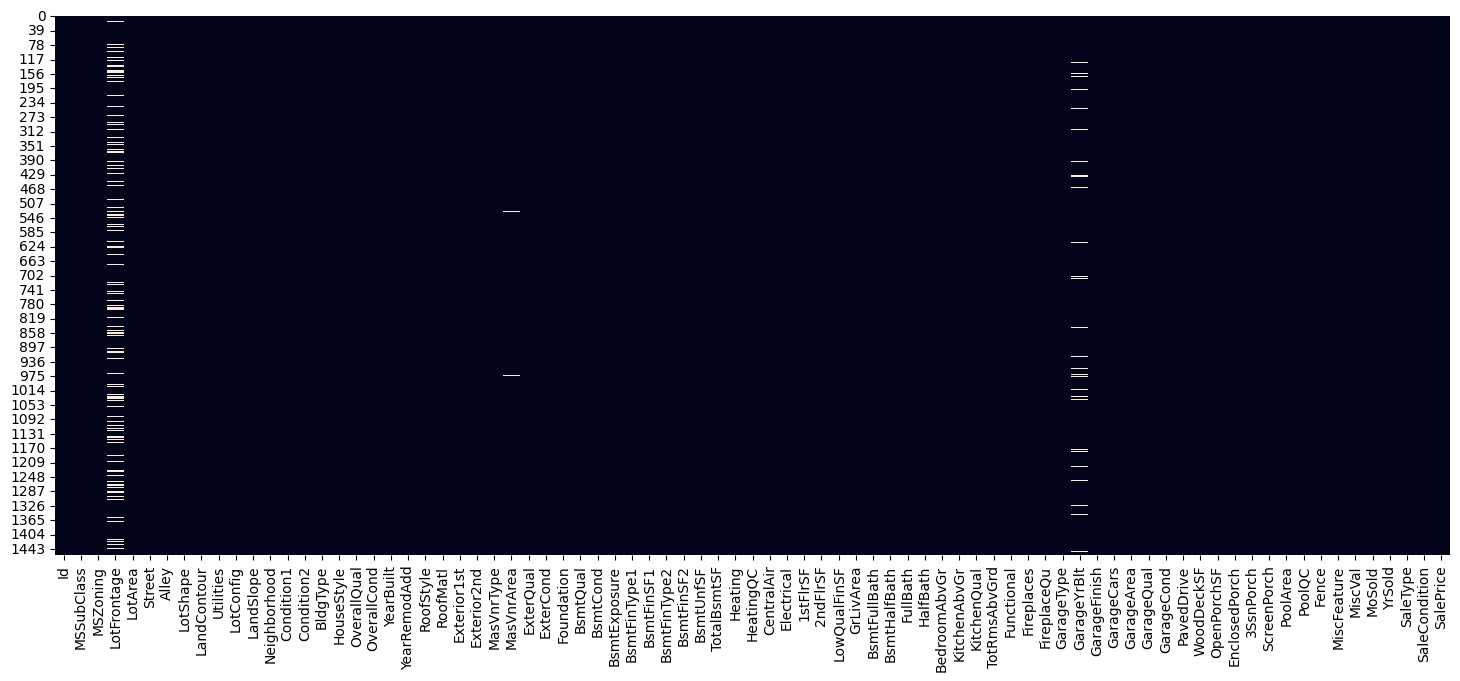

In [17]:
plt.figure(figsize=(18,7))
sns.heatmap(hp_train.isnull(), cbar=False)

In [15]:
hp_train['LotFrontage'].mode()[0]

60.0

In [16]:
# Fill na with Mode
for mem in ms_cols :
    hp_train[mem] = hp_train[mem].fillna(hp_train[mem].mode()[0])

na_info(hp_train)

Empty DataFrame
Columns: [col_name, null_count, percent_null]
Index: []

## **Data Prepare & EDA**

### **Make Date Diff cols**

Date Cols

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

GarageYrBlt: Year garage was built

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

In [17]:
import datetime

today = datetime.date.today()

year_now = today.year

yearId_now = today.strftime("%Y-%m") # year_month

print(today , type(today))
print(year_now , type(year_now))
print(yearId_now , type(yearId_now))

2023-12-29 <class 'datetime.date'>
2023 <class 'int'>
2023-12 <class 'str'>


In [18]:
date_cols1 = ['YearBuilt','YearRemodAdd','GarageYrBlt']
date_cols2 = ['MoSold','YrSold']

In [19]:
hp_train["House_old"] = today.year - hp_train["YearBuilt"]
hp_train["reModel_old"] = today.year - hp_train['YearRemodAdd']
hp_train["Garage_old"] = today.year - hp_train['GarageYrBlt']
hp_train[["House_old","reModel_old","Garage_old"]].head()

House_old  reModel_old  Garage_old
0         20           20        20.0
1         47           47        47.0
2         22           21        22.0
3        108           53        25.0
4         23           23        23.0

In [20]:
hp_train[["House_old","reModel_old","Garage_old"]].dtypes

House_old        int64
reModel_old      int64
Garage_old     float64
dtype: object

In [27]:
new_cols1 = ["House_old","reModel_old","Garage_old"]

In [21]:
hp_train[date_cols2].describe()

MoSold       YrSold
count  1460.000000  1460.000000
mean      6.321918  2007.815753
std       2.703626     1.328095
min       1.000000  2006.000000
25%       5.000000  2007.000000
50%       6.000000  2008.000000
75%       8.000000  2009.000000
max      12.000000  2010.000000

In [22]:
hp_train[date_cols2] = hp_train[date_cols2].astype(str)
hp_train[date_cols2].dtypes

MoSold    object
YrSold    object
dtype: object

In [23]:
hp_train["yearId_sold"] = hp_train["YrSold"]+"-"+hp_train["MoSold"]

In [24]:
hp_train[['yearId_sold']].head()

yearId_sold
0      2008-2
1      2007-5
2      2008-9
3      2006-2
4     2008-12

In [25]:
hp_train['yearId_sold'] = pd.to_datetime(hp_train['yearId_sold'], format='%Y-%m')
hp_train['dif_moSold'] = ((today.year - hp_train['yearId_sold'].dt.year) * 12 + (today.month - hp_train['yearId_sold'].dt.month))
hp_train[['yearId_sold','dif_moSold']].head()

yearId_sold  dif_moSold
0  2008-02-01         190
1  2007-05-01         199
2  2008-09-01         183
3  2006-02-01         214
4  2008-12-01         180

In [31]:
new_cols2 = ['dif_moSold']

In [29]:
hp_train['dif_moSold'].dtype

dtype('int64')

In [32]:
hp_train[date_cols1+new_cols1+date_cols2+new_cols2].head()

YearBuilt  YearRemodAdd  GarageYrBlt  House_old  reModel_old  Garage_old  \
0       2003          2003       2003.0         20           20        20.0   
1       1976          1976       1976.0         47           47        47.0   
2       2001          2002       2001.0         22           21        22.0   
3       1915          1970       1998.0        108           53        25.0   
4       2000          2000       2000.0         23           23        23.0   

  MoSold YrSold  dif_moSold  
0      2   2008         190  
1      5   2007         199  
2      9   2008         183  
3      2   2006         214  
4     12   2008         180

In [33]:
hp_train.drop(columns=date_cols1 , inplace= True)
hp_train.drop(columns=date_cols2 , inplace= True)
hp_train.drop(columns=['yearId_sold'],inplace=True)

In [35]:
# for furture new commer
def date_prepare_pip(df):
    
    import datetime
    
    today = datetime.date.today()
    
    date_cols1 = ['YearBuilt','YearRemodAdd','GarageYrBlt']
    date_cols2 = ['MoSold','YrSold']
    
    # Old cal part
    df["House_old"] = today.year - df["YearBuilt"]
    df["reModel_old"] = today.year - df['YearRemodAdd']
    df["Garage_old"] = today.year - df['GarageYrBlt']
    df.drop(columns=date_cols1 , inplace= True)
    
    # diff yearId part
    df[date_cols2] = df[date_cols2].astype(str)
    df["yearId_sold"] = df["YrSold"]+"-"+df["MoSold"]
    
    df.drop(columns=date_cols2 , inplace= True)
    
    df['yearId_sold'] = pd.to_datetime(df['yearId_sold'], format='%Y-%m')
    df['dif_moSold'] = ((today.year - df['yearId_sold'].dt.year) * 12 + (today.month - df['yearId_sold'].dt.month))
    
    df.drop(columns=['yearId_sold'],inplace=True)
    
    return df

Column names

In [36]:
obj_cols = [mem for mem in hp_train.select_dtypes(include=['object']).columns]
print(obj_cols)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [37]:
num_cols = [ mem for mem in hp_train.select_dtypes(include=['number']).columns]
num_cols.remove("SalePrice")
num_cols.remove("Id")
print(num_cols)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'House_old', 'reModel_old', 'Garage_old', 'dif_moSold']


In [38]:
target_col = "SalePrice"

### **Number Columns**

In [39]:
len(num_cols)

34

In [40]:
print(num_cols)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'House_old', 'reModel_old', 'Garage_old', 'dif_moSold']


<AxesSubplot: xlabel='LotFrontage', ylabel='SalePrice'>

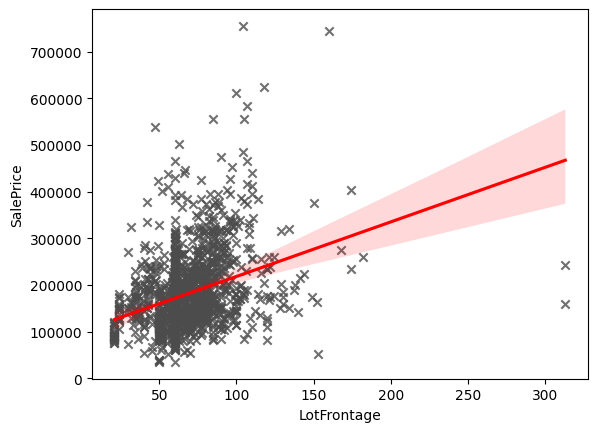

In [74]:
sns.regplot(data=hp_train, x='LotFrontage', y=target_col, ci=99, marker="x" , color=".3", line_kws=dict(color="r"))

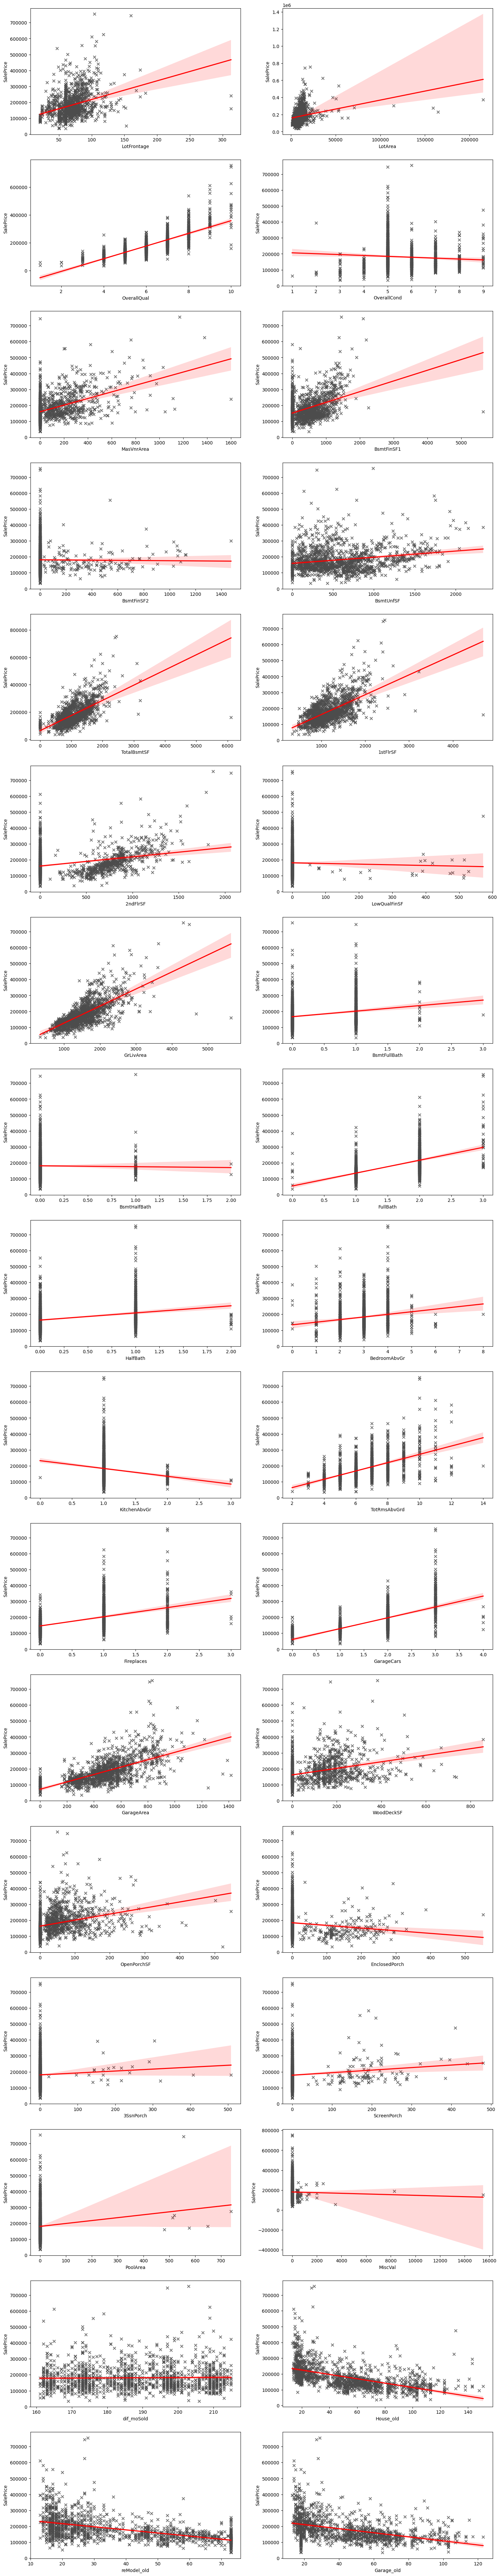

In [77]:
plt.figure(figsize=(18,100))

for i , col in enumerate(num_cols) :
    plt.subplot(17,2,i+1)
    sns.regplot(data=hp_train, x=col, y=target_col, ci=99, marker="x" , color=".3", line_kws=dict(color="r"))

<AxesSubplot: >

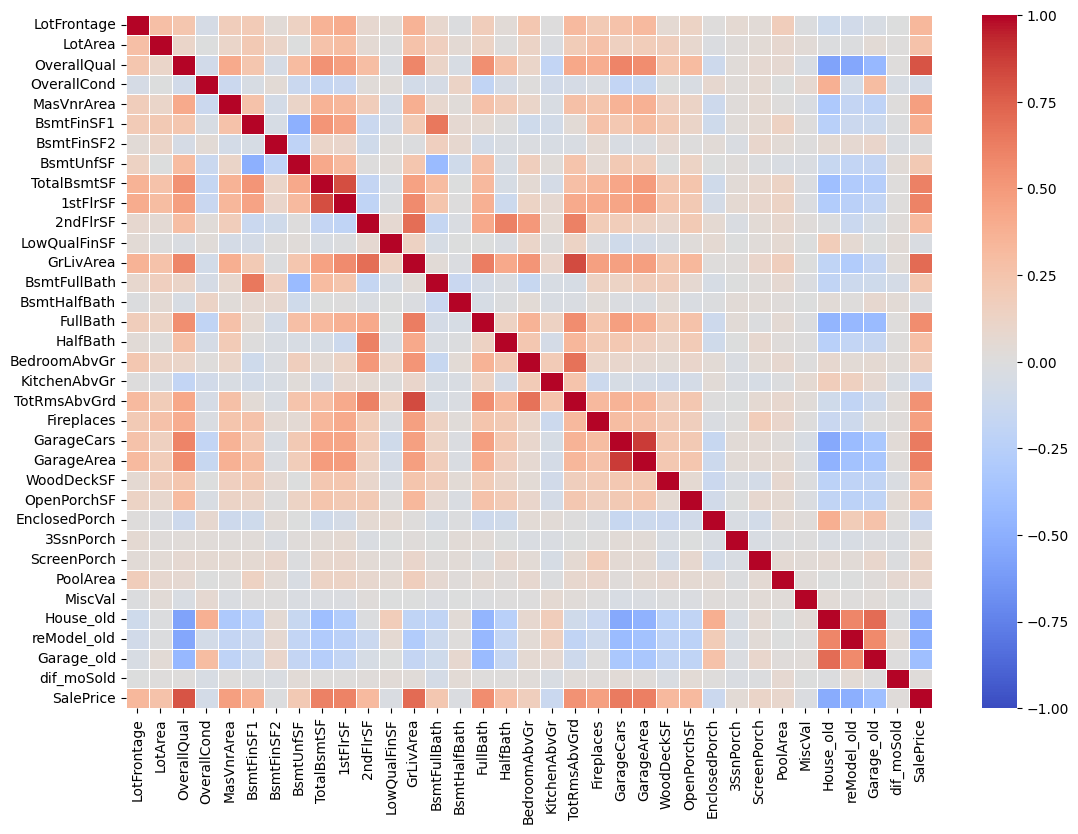

In [41]:
corr_df = hp_train[num_cols+[target_col]].corr()

plt.figure(figsize=(13,9))
sns.heatmap(corr_df,cmap='coolwarm', vmin=-1 , vmax=1 ,linewidths=0.5)

In [42]:
# Select higt correlation than 0.5
corr_with_target = corr_df[["SalePrice"]]
corr_with_target[ (corr_with_target.SalePrice>=0.5) | (corr_with_target.SalePrice<= -0.5)]

SalePrice
OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
FullBath       0.560664
TotRmsAbvGrd   0.533723
GarageCars     0.640409
GarageArea     0.623431
House_old     -0.522897
reModel_old   -0.507101
SalePrice      1.000000

In [43]:
highCorr_num_cols = [col for col in corr_with_target[ (corr_with_target.SalePrice>=0.5) | (corr_with_target.SalePrice<= -0.5)].index]
highCorr_num_cols.remove('SalePrice')
highCorr_num_cols

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'House_old',
 'reModel_old']

In [44]:
len(highCorr_num_cols)

10

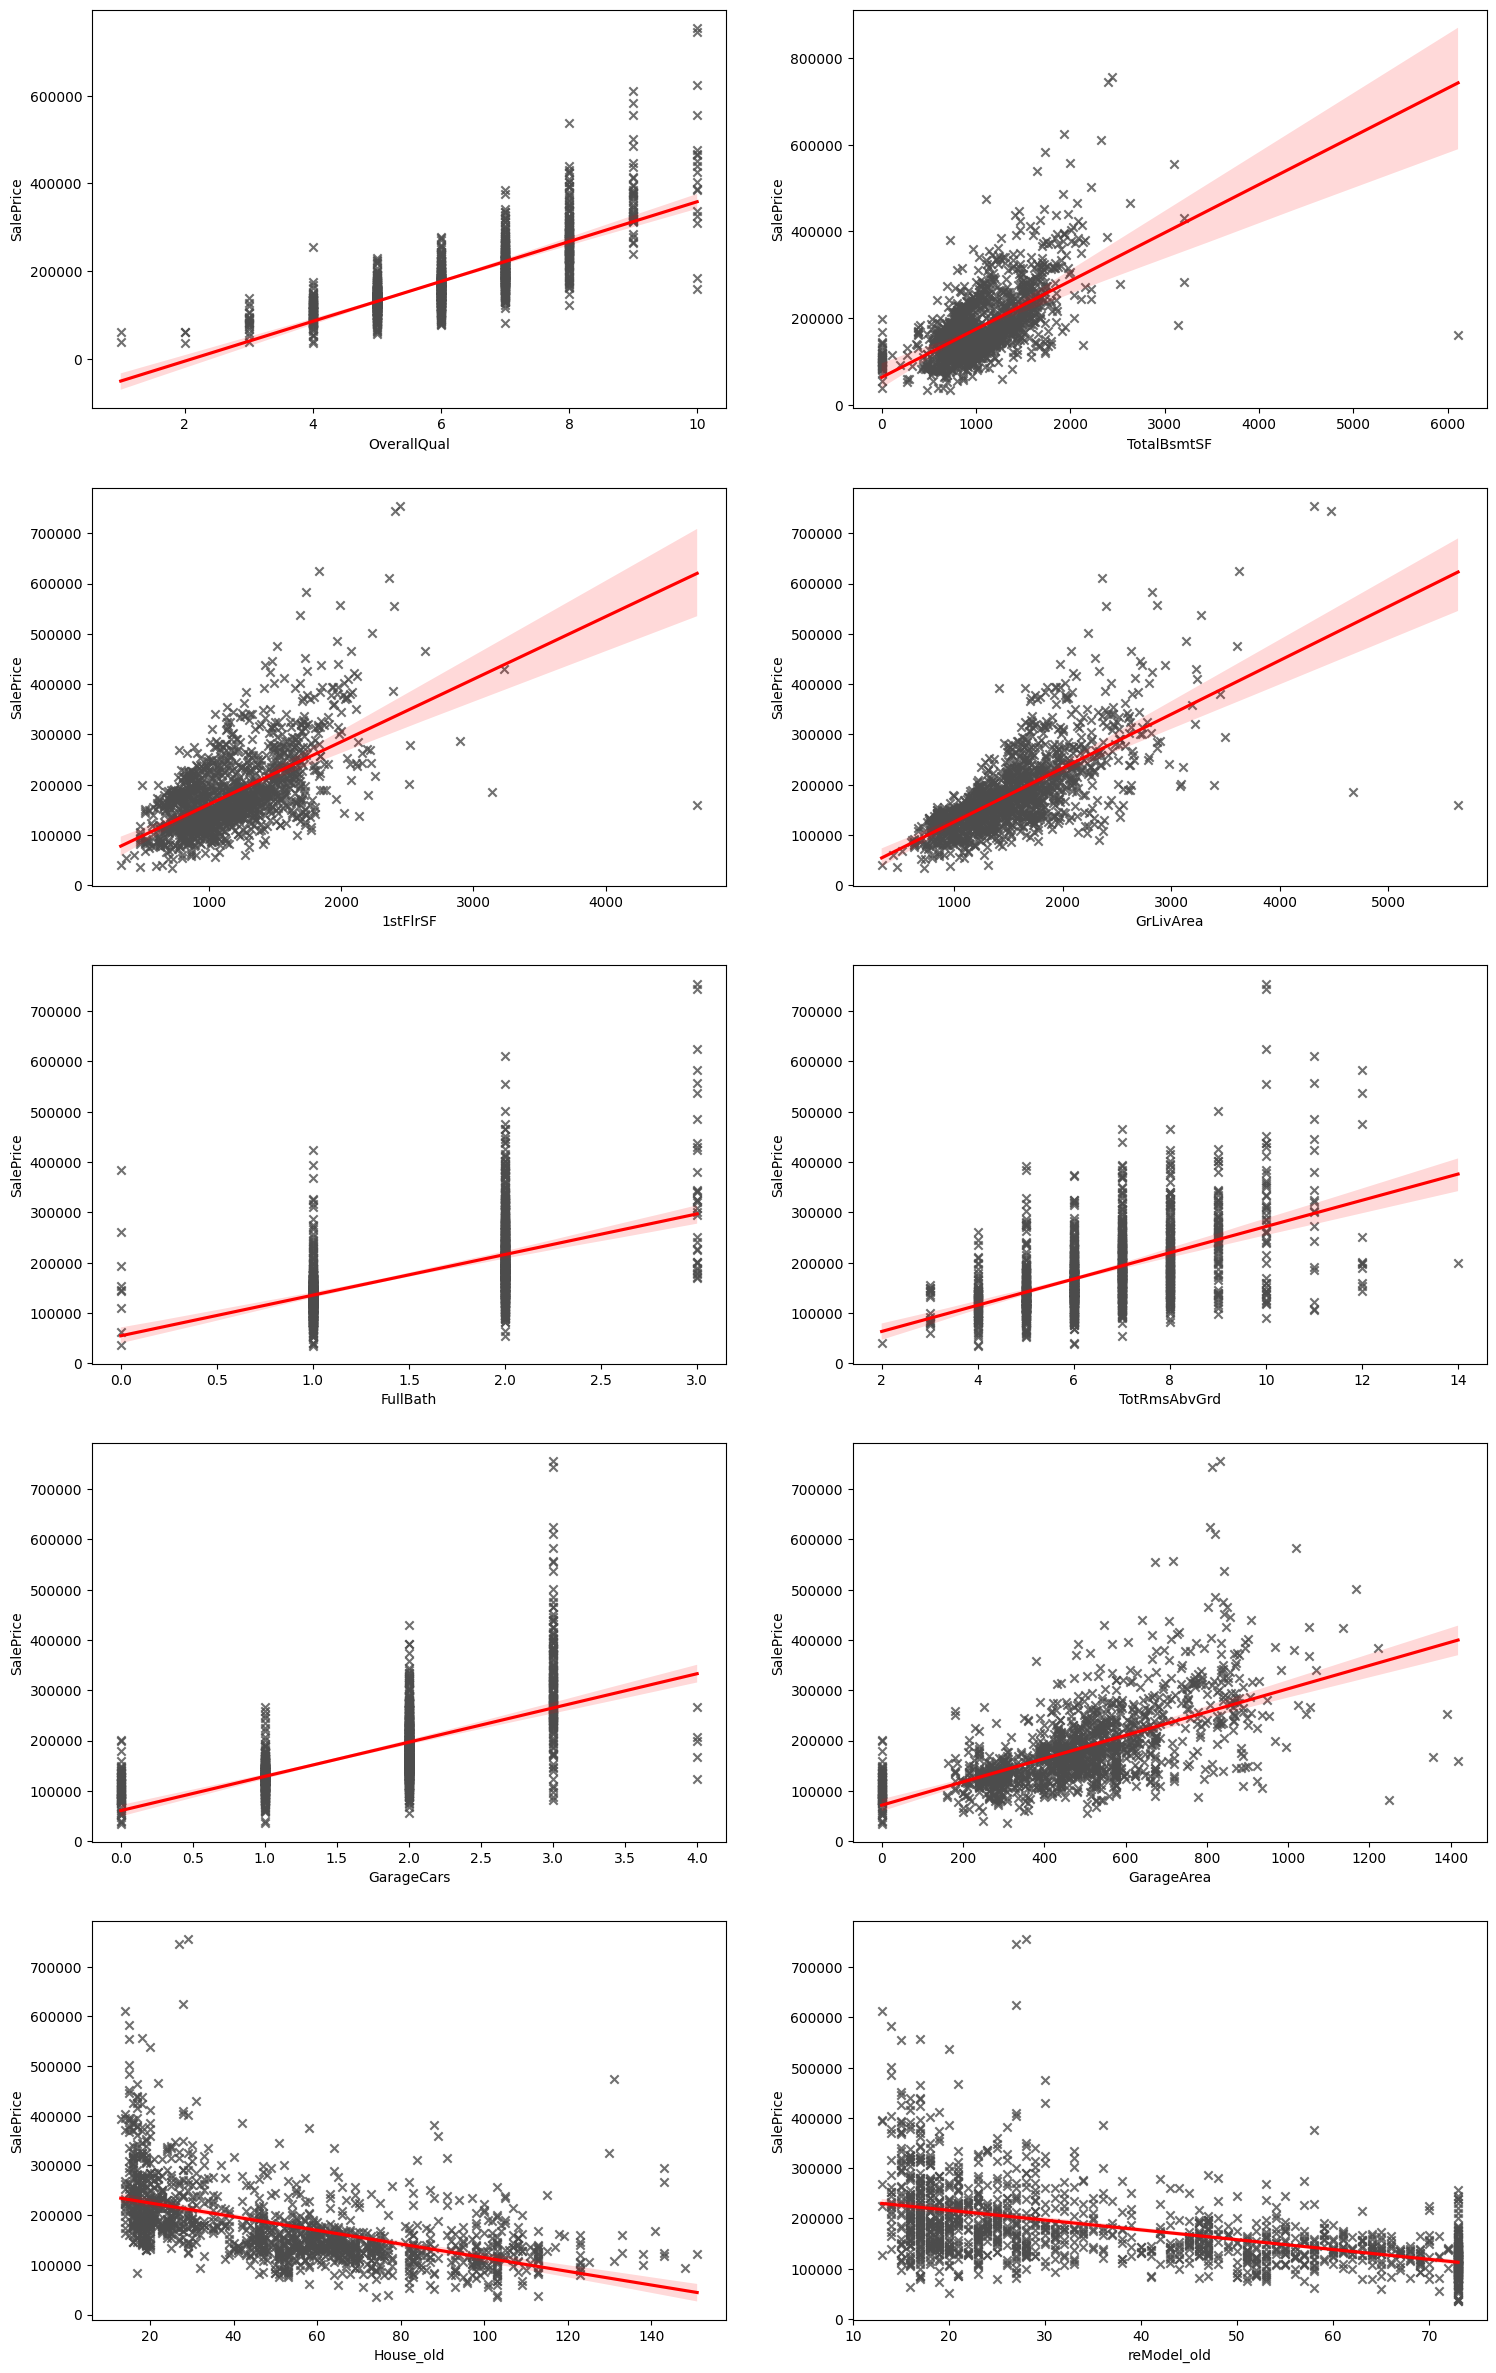

In [80]:
plt.figure(figsize=(18,30))

for i , col in enumerate(highCorr_num_cols) :
    plt.subplot(5,2,i+1)
    sns.regplot(data=hp_train, x=col, y=target_col, ci=99, marker="x" , color=".3", line_kws=dict(color="r"))

### **Obj cols**

In [45]:
print(obj_cols)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [46]:
len(obj_cols)

44

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

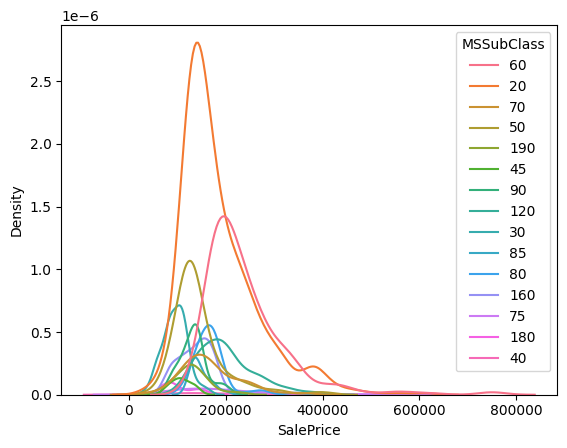

In [54]:
sns.kdeplot(data=hp_train , x=target_col ,hue='MSSubClass')

C:\Users\USER\AppData\Local\Temp\ipykernel_7104\4049916125.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=hp_train , x=target_col ,hue=col)
C:\Users\USER\AppData\Local\Temp\ipykernel_7104\4049916125.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=hp_train , x=target_col ,hue=col)
C:\Users\USER\AppData\Local\Temp\ipykernel_7104\4049916125.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=hp_train , x=target_col ,hue=col)
C:\Users\USER\AppData\Local\Temp\ipykernel_7104\4049916125.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=hp_train , x=target_col ,hue=col)
C:\Users\USER\AppData\Local\Temp\ipykernel_7104\4049916125.py:5:

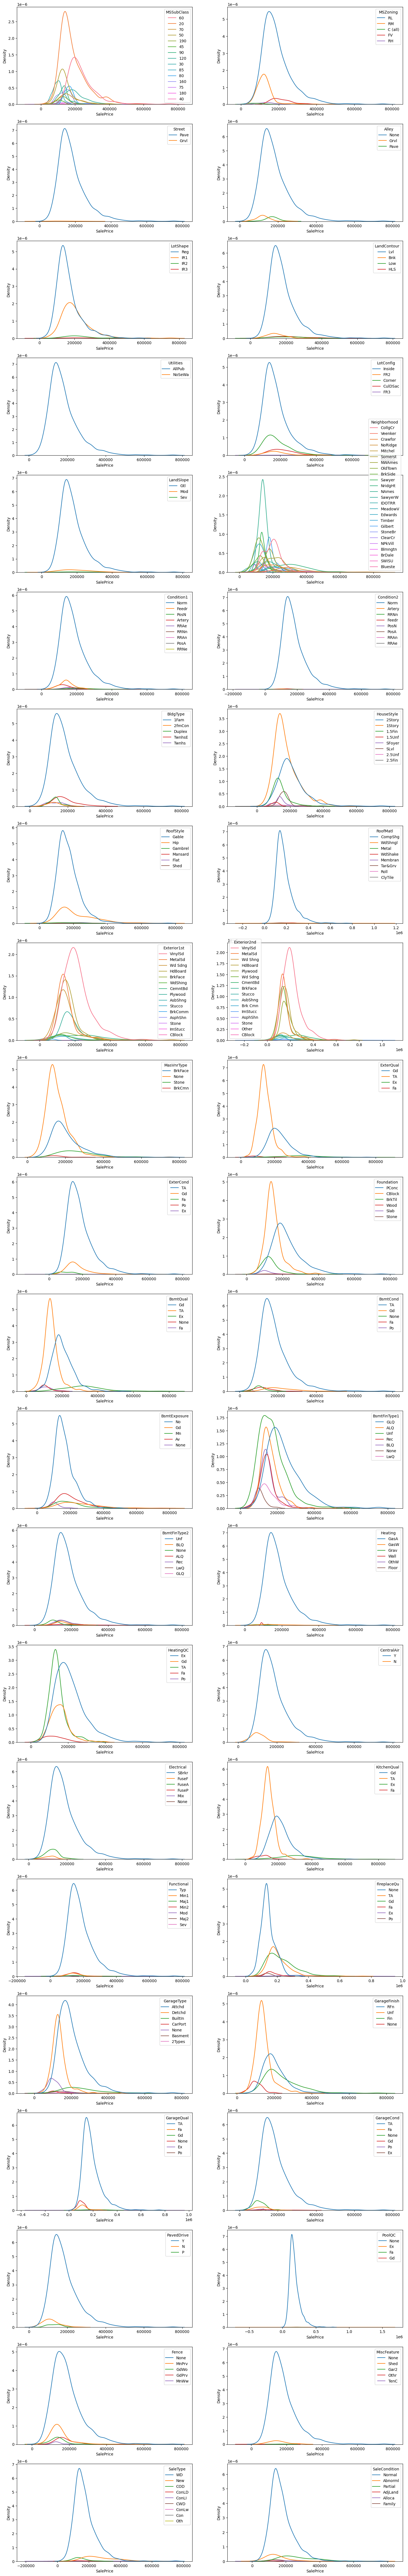

In [47]:
plt.figure(figsize=(18,120))

for i , col in enumerate(obj_cols) :
    plt.subplot(22,2,i+1)
    sns.kdeplot(data=hp_train , x=target_col ,hue=col)

<AxesSubplot: xlabel='MSSubClass', ylabel='SalePrice'>

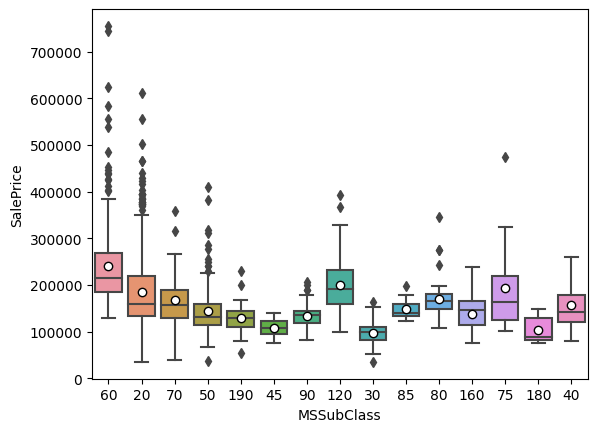

In [65]:
mean_type = {"marker":"o", "markerfacecolor":"white" ,"markeredgecolor":"black" }
sns.boxplot(data=hp_train , y=target_col , x ='MSSubClass' ,showmeans = True , meanprops = mean_type)

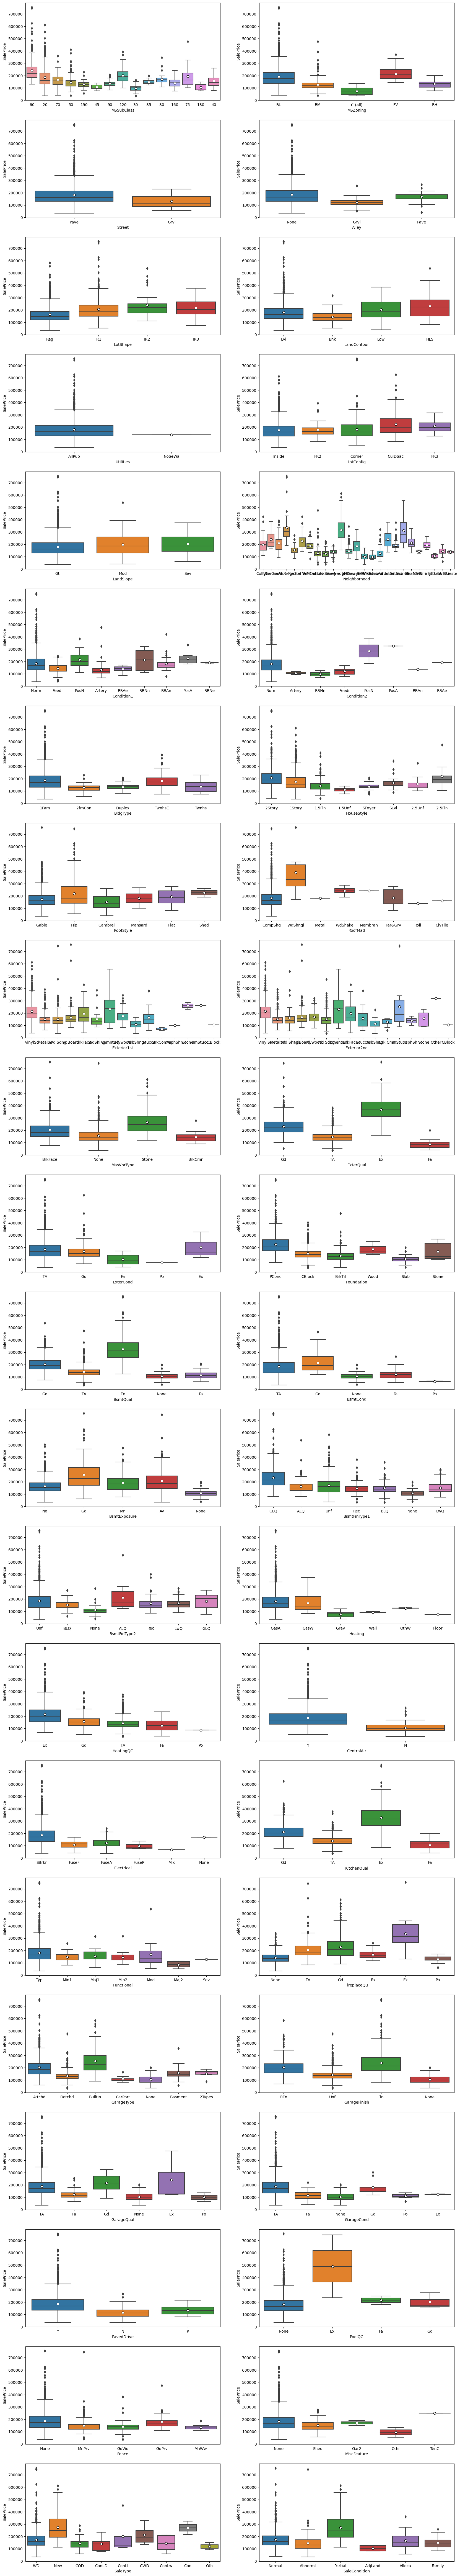

In [68]:
plt.figure(figsize=(20,120))

mean_type = {"marker":"o", "markerfacecolor":"white" ,"markeredgecolor":"black" }

for i , col in enumerate(obj_cols) :
    plt.subplot(22,2,i+1)
    sns.boxplot(data=hp_train , y=target_col , x =col ,showmeans = True , meanprops = mean_type)

### Select Cols & Model

In [48]:
hp_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [49]:
select_cols = ['Id'] + highCorr_num_cols + obj_cols + [target_col]
print(select_cols)

['Id', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'House_old', 'reModel_old', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'SalePrice']


In [50]:
len(select_cols)

56

In [51]:
hp_train_sel = hp_train[select_cols]
hp_train_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   OverallQual    1460 non-null   int64 
 2   TotalBsmtSF    1460 non-null   int64 
 3   1stFlrSF       1460 non-null   int64 
 4   GrLivArea      1460 non-null   int64 
 5   FullBath       1460 non-null   int64 
 6   TotRmsAbvGrd   1460 non-null   int64 
 7   GarageCars     1460 non-null   int64 
 8   GarageArea     1460 non-null   int64 
 9   House_old      1460 non-null   int64 
 10  reModel_old    1460 non-null   int64 
 11  MSSubClass     1460 non-null   object
 12  MSZoning       1460 non-null   object
 13  Street         1460 non-null   object
 14  Alley          1460 non-null   object
 15  LotShape       1460 non-null   object
 16  LandContour    1460 non-null   object
 17  Utilities      1460 non-null   object
 18  LotConfig      1460 non-null

In [52]:
ordinal_col_info = {'ExterQual':['Po','Fa','TA','Gd','Ex'] ,
                    'ExterCond':['Po','Fa','TA','Gd','Ex'],
                    'BsmtQual':['None','Po','Fa','TA','Gd','Ex'],
                    'BsmtCond':['None','Po','Fa','TA','Gd','Ex'],
                    'BsmtExposure':['None','No','Mn','Av','Gd'],
                    'BsmtFinType1':['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                    'BsmtFinType2':['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
                    'HeatingQC':['Po','Fa','TA','Gd','Ex'],
                    'Electrical':['Mix','FuseP','FuseF','FuseA','SBrkr'],
                    'KitchenQual':['Po','Fa','TA','Gd','Ex'],
                    'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
                    'FireplaceQu':['None','Po','Fa','TA','Gd','Ex'],
                    'GarageFinish':['None','Unf','RFn','Fin'],
                    'GarageQual':['None','Po','Fa','TA','Gd','Ex'],
                    'GarageCond':['None','Po','Fa','TA','Gd','Ex'],
                    'PavedDrive':['N','P','Y'],
                    'PoolQC':['None','Fa','TA','Gd','Ex'],
                    'Fence':['None','MnWw','GdWo','MnPrv','GdPrv']}

ordinal_cols = list(ordinal_col_info.keys())

print(ordinal_cols)

['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']


In [53]:
from pycaret.regression import *

In [54]:
pc_seting = setup(data = hp_train_sel , target = target_col , ignore_features = 'Id' ,
            numeric_imputation = 'mode', ordinal_features = ordinal_col_info , normalize = True ,
            transformation = True , transform_target = True , session_id = 47 )

In [55]:
find_best = compare_models()

In [57]:
# check available models
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
lightgbm    Light Gradient Boosting Machine   
dummy                       Dummy Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
dummy                          sklearn.dummy.DummyRegressor   True

In [58]:
bay_model = create_model('br')

In [59]:
print(bay_model)

BayesianRidge()


In [60]:
tuned_bay_model = tune_model(bay_model)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


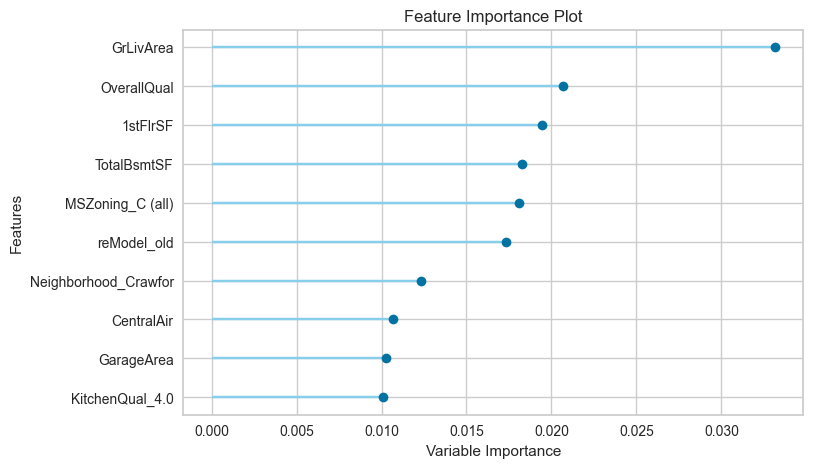

In [62]:
plot_model(tuned_bay_model, plot = 'feature')

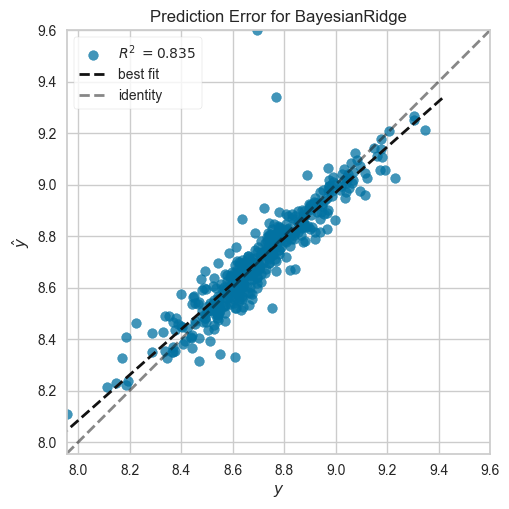

In [63]:
plot_model(tuned_bay_model, plot = 'error')

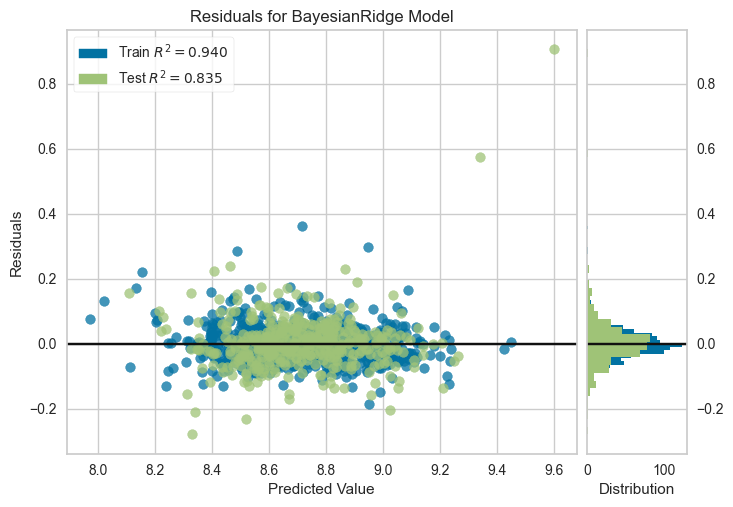

In [64]:
plot_model(tuned_bay_model, plot = 'residuals')

Made Model with all data

In [65]:
final_bay_model = finalize_model(tuned_bay_model)

In [66]:
print(final_bay_model)

Pipeline(memory=Memory(location=None),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['OverallQual', 'TotalBsmtSF',
                                             '1stFlrSF', 'GrLivArea',
                                             'FullBath', 'TotRmsAbvGrd',
                                             'GarageCars', 'GarageArea',
                                             'House_old', 'reMode...
                                                                    'BsmtQual',
                                                                    'BsmtCond',
                                                                    'BsmtExposure',
                                                                    'BsmtFinType1',
                                                                  

# **Part 2 : Prediction**

In [67]:
unseen_path = r'house-prices-advanced-regression-techniques\test.csv'

unseen_data = pd.read_csv(unseen_path)

In [68]:
unseen_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [69]:
unseen_data[fill_with_none_cols] = unseen_data[fill_with_none_cols].fillna('None')
na_info(unseen_data)

col_name  null_count  percent_null
62    BsmtFinSF2           1          0.07
63     BsmtUnfSF           1          0.07
64   TotalBsmtSF           1          0.07
65      SaleType           1          0.07
66   KitchenQual           1          0.07
67    GarageArea           1          0.07
68    GarageCars           1          0.07
69   Exterior2nd           1          0.07
70   Exterior1st           1          0.07
71    BsmtFinSF1           1          0.07
72     Utilities           2          0.14
73  BsmtFullBath           2          0.14
74  BsmtHalfBath           2          0.14
75    Functional           2          0.14
76      MSZoning           4          0.27
77    MasVnrArea          15          1.03
78   GarageYrBlt          78          5.35
79   LotFrontage         227         15.56

In [70]:
unseen_data = date_prepare_pip(unseen_data)

In [72]:
unseen_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [78]:
print(select_cols)

['Id', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'House_old', 'reModel_old', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [76]:
select_cols.remove('SalePrice')
print(select_cols)

None


In [79]:
unseen_data = unseen_data[select_cols]
unseen_data.columns

Index(['Id', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'House_old', 'reModel_old',
       'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [80]:
hp_predicted = predict_model(final_bay_model , data = unseen_data)
hp_predicted.head()

Id  OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  \
0  1461            5        882.0       896        896         1   
1  1462            6       1329.0      1329       1329         1   
2  1463            5        928.0       928       1629         2   
3  1464            6        926.0       926       1604         2   
4  1465            8       1280.0      1280       1280         2   

   TotRmsAbvGrd  GarageCars  GarageArea  House_old  ...  GarageFinish  \
0             5         1.0       730.0         62  ...           Unf   
1             6         1.0       312.0         65  ...           Unf   
2             6         2.0       482.0         26  ...           Fin   
3             7         2.0       470.0         25  ...           Fin   
4             5         2.0       506.0         31  ...           RFn   

   GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
0          TA         TA          Y   None  MnPrv        None       WD   
1          TA         TA          Y   None   None        Gar2       WD   
2          TA         TA          Y   None  MnPrv        None       WD   
3          TA         TA          Y   None   None        None       WD   
4          TA         TA          Y   None   None        None       WD   

  SaleCondition prediction_label  
0        Normal    114750.164945  
1        Normal    154937.285162  
2        Normal    176931.337272  
3        Normal    190337.066980  
4        Normal    203885.128185  

[5 rows x 56 columns]

In [81]:
hp_submission = hp_predicted[['Id','prediction_label']].rename(columns={'prediction_label': "SalePrice"})
hp_submission.head()

Id      SalePrice
0  1461  114750.164945
1  1462  154937.285162
2  1463  176931.337272
3  1464  190337.066980
4  1465  203885.128185

In [ ]:
# Export the DataFrame to a CSV file without index

hp_submission.to_csv('mySubmission_v5.csv', index=False)